### Import your librares

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load your dataset

In [2]:
df = pd.read_csv('seattle_weather.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


<Axes: >

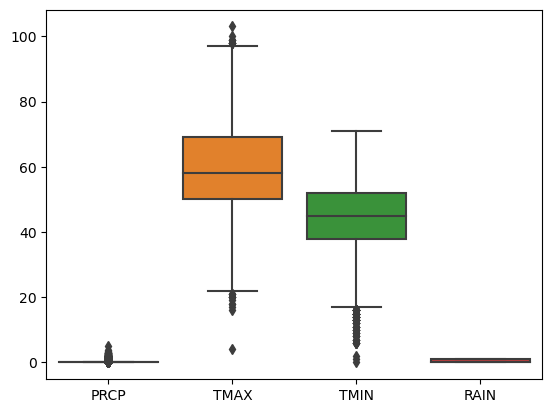

In [5]:
sns.boxplot(df)

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


<Axes: >

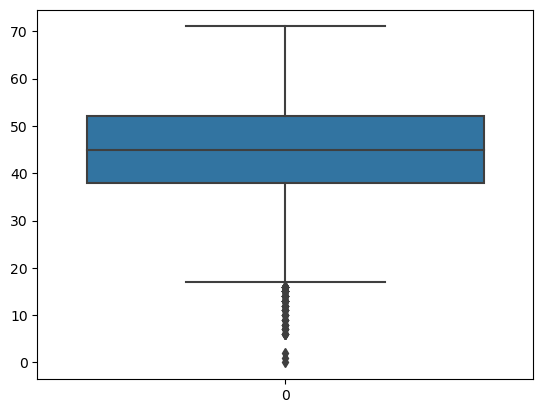

In [6]:
sns.boxplot(df.TMIN)

In [7]:
Q1 = np.percentile(df.TMIN, 25, interpolation = 'midpoint')
Q3 = np.percentile(df.TMIN, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers 73.0


In [8]:
df = df.drop(df[(df.TMIN > 73.0) | (df.TMIN < 17.0)].index)

<Axes: >

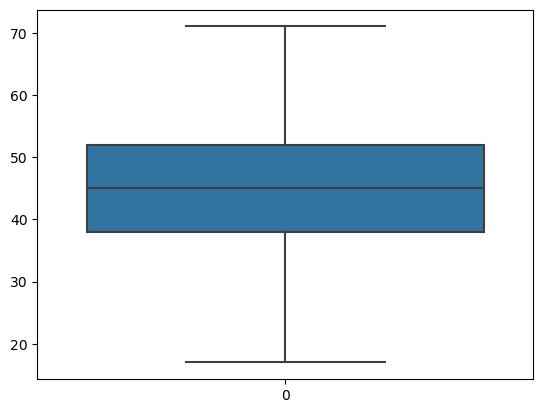

In [9]:
sns.boxplot(df.TMIN)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25459 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25459 non-null  object 
 1   PRCP    25456 non-null  float64
 2   TMAX    25459 non-null  int64  
 3   TMIN    25459 non-null  int64  
 4   RAIN    25456 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ MB


<Axes: >

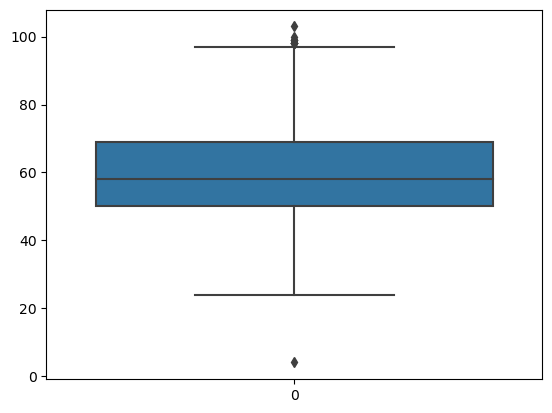

In [11]:
sns.boxplot(df.TMAX)

In [12]:
Q1 = np.percentile(df.TMAX, 25, interpolation = 'midpoint')
Q3 = np.percentile(df.TMAX, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  21.5
higher bound outliers 97.5


In [13]:
df = df.drop(df[(df.TMAX > 97.5) | (df.TMAX < 21.5)].index)

<Axes: >

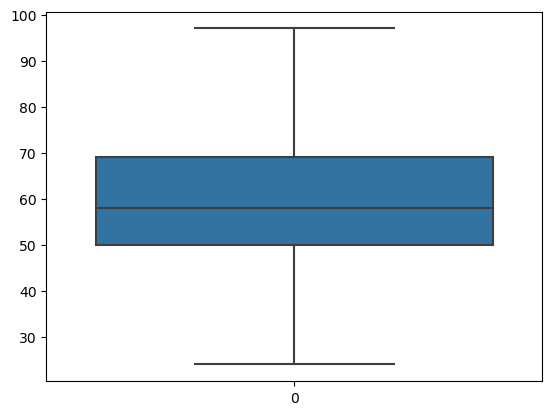

In [14]:
sns.boxplot(df.TMAX)

Now that I removed outliers from columns with no nulls I will first handle missing value and repeat the procedure for PRCP

In [15]:
df[df.RAIN.isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [16]:
df[df.PRCP.isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [17]:
df.loc[18412:18419]

,DATE,PRCP,TMAX,TMIN,RAIN
18412,1998-05-30,0.0,61,52,False
18413,1998-05-31,0.0,73,48,False
18414,1998-06-01,0.0,62,51,False
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
18417,1998-06-04,0.0,60,53,False
18418,1998-06-05,0.0,66,53,False
18419,1998-06-06,0.0,75,52,False


considering days before and after it is less likely that it rained on these 2 days so I will replace it with false 

In [18]:
df.loc[21065:21070]

,DATE,PRCP,TMAX,TMIN,RAIN
21065,2005-09-03,0.0,71,53,False
21066,2005-09-04,0.0,68,53,False
21067,2005-09-05,NaN,70,52,NaN
21068,2005-09-06,0.0,73,52,False
21069,2005-09-07,0.0,77,52,False
21070,2005-09-08,0.0,77,54,False


for the third date the case seems to be the same so replacing all nulls in the rain column with False is justified 

In [19]:
df.RAIN.fillna('False', inplace= True)

As for PRCP since we assumed there was no rain in these days and values before and after are also 0 we can only assume that it was 0 during these days 

In [20]:
df.PRCP.fillna(0.0, inplace=True)

<Axes: >

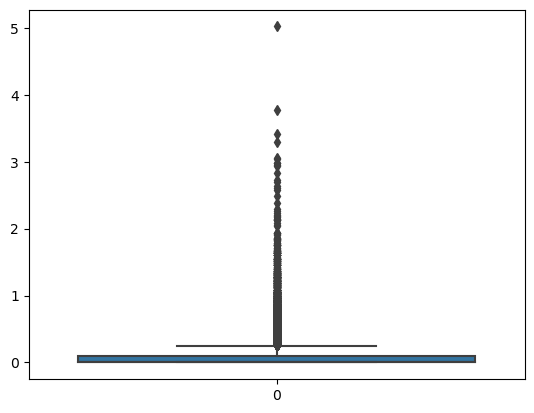

In [21]:
sns.boxplot(df.PRCP)

In [22]:
Q1 = np.percentile(df.PRCP, 25, interpolation = 'midpoint')
Q3 = np.percentile(df.PRCP, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


In [23]:
df = df.drop(df[(df.PRCP > 0.25) | (df.PRCP < -0.15000000000000002)].index)

<Axes: xlabel='PRCP'>

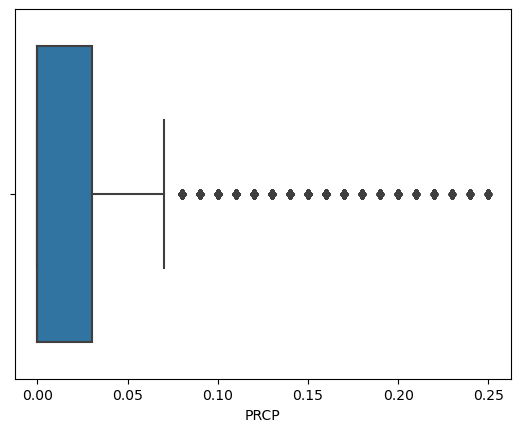

In [24]:
sns.boxplot(df, x = "PRCP")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21893 entries, 4 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21893 non-null  object 
 1   PRCP    21893 non-null  float64
 2   TMAX    21893 non-null  int64  
 3   TMIN    21893 non-null  int64  
 4   RAIN    21893 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.0+ MB


More than 4000 rows have been dropped, we may need to consider a different approach next time 